In [2]:
import numpy as np
import pandas as pd
import os

data_path = os.path.abspath(os.path.join("2","..", "..","..", "data", "external","word-embeddings.feather"))
data_path2 = os.path.abspath(os.path.join("2","..", "..","..", "data", "external","2d_clustering.csv"))

df_vis = pd.read_csv(data_path2)
df = pd.read_feather(data_path)  

print(df_vis.head())

            x           y  color
0  516.012706  393.014514      0
1  436.211762  408.656585      0
2  512.052601  372.022014      0
3  489.140464  401.807159      0
4  446.207986  338.516682      0


In [3]:
import numpy as np

string_array = np.array(df['vit'].tolist())  

print(string_array.shape)

(200, 512)


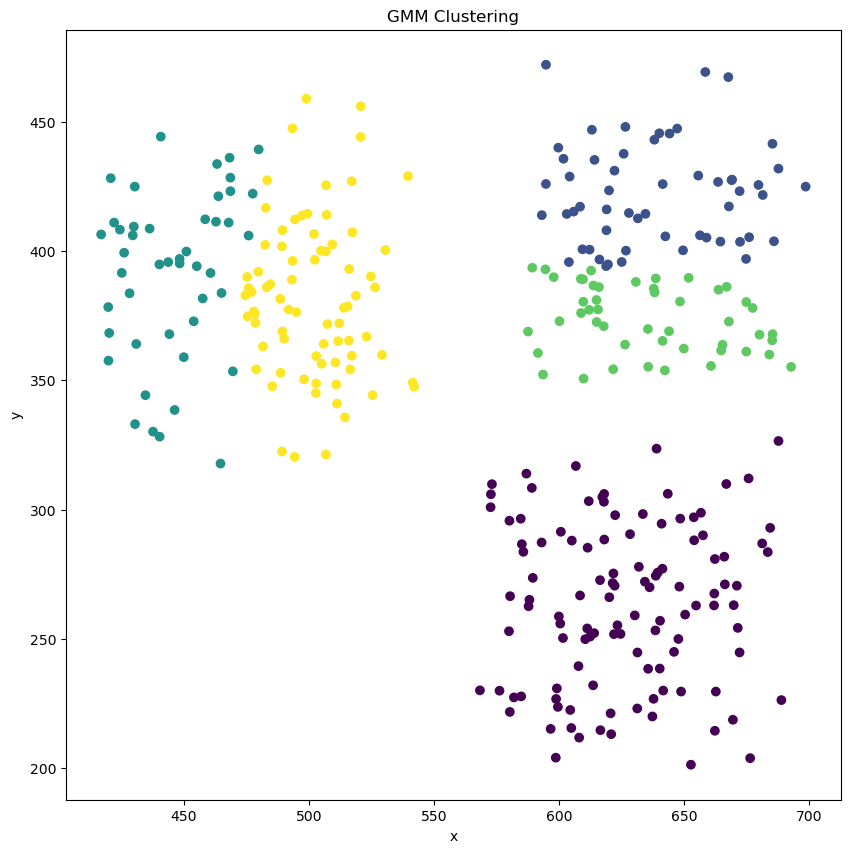

In [4]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

df_analysis = df_vis.copy()
df_analysis = df_analysis.drop(columns=['color'])
visualization = df_analysis[['x', 'y']].to_numpy()  # Convert to NumPy

n_clusters = 5

# Fit GMM to the data
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm.fit(visualization)

# Predict cluster labels
df_analysis['cluster'] = gmm.predict(visualization)

# Plot the results
plt.figure(figsize=(10, 10))
plt.scatter(df_analysis['x'], df_analysis['y'], c=df_analysis['cluster'], cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('plots/4_toydata_gmm-clustering.png')
plt.show()


Converged after 16 iterations


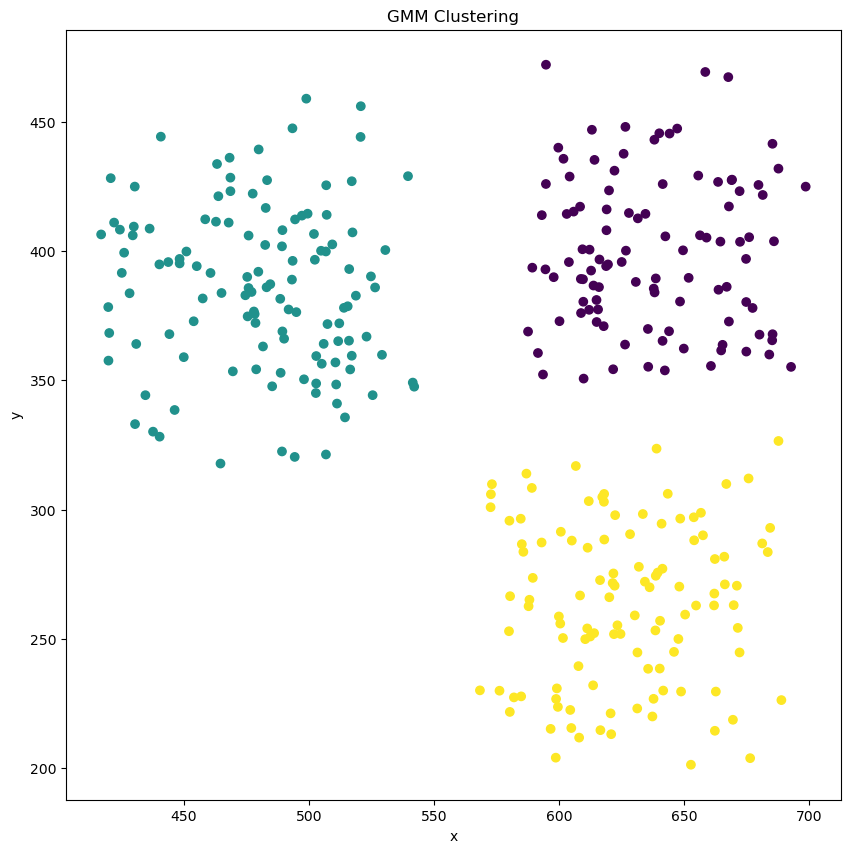

In [5]:
import sys
from scipy.stats import multivariate_normal
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))  
from models.GMM.GMM import GMM

df_analysis = df_vis.copy()
df_analysis = df_analysis.drop(columns=['color'])
visualization = df_analysis[['x', 'y']].to_numpy()  

n_clusters = 3

# print(np.cov(visualization.T).shape)

gmm = GMM(k=n_clusters)
gmm.fit(visualization)

df_analysis['cluster'] = gmm.predict(visualization)

plt.figure(figsize=(10, 10))
plt.scatter(df_analysis['x'], df_analysis['y'], c=df_analysis['cluster'], cmap='viridis')
plt.title('GMM Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Converged after 2 iterations
Converged after 7 iterations
Converged after 40 iterations
Converged after 166 iterations
Converged after 206 iterations
Converged after 233 iterations
Converged after 221 iterations
Converged after 167 iterations
Converged after 427 iterations
Converged after 308 iterations
Converged after 294 iterations
Converged after 182 iterations
Converged after 278 iterations
Converged after 190 iterations
Converged after 180 iterations
Converged after 183 iterations
Converged after 178 iterations
Converged after 226 iterations
Converged after 159 iterations


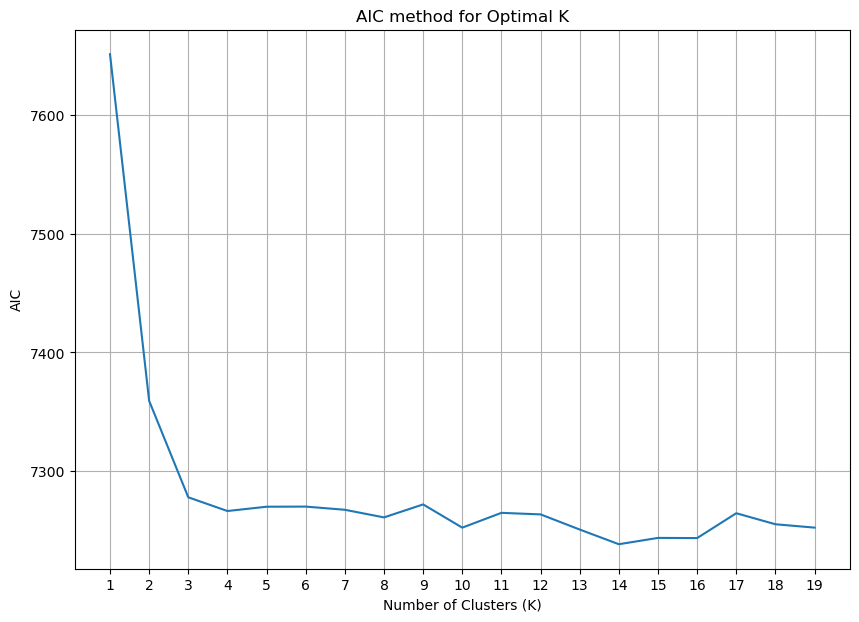

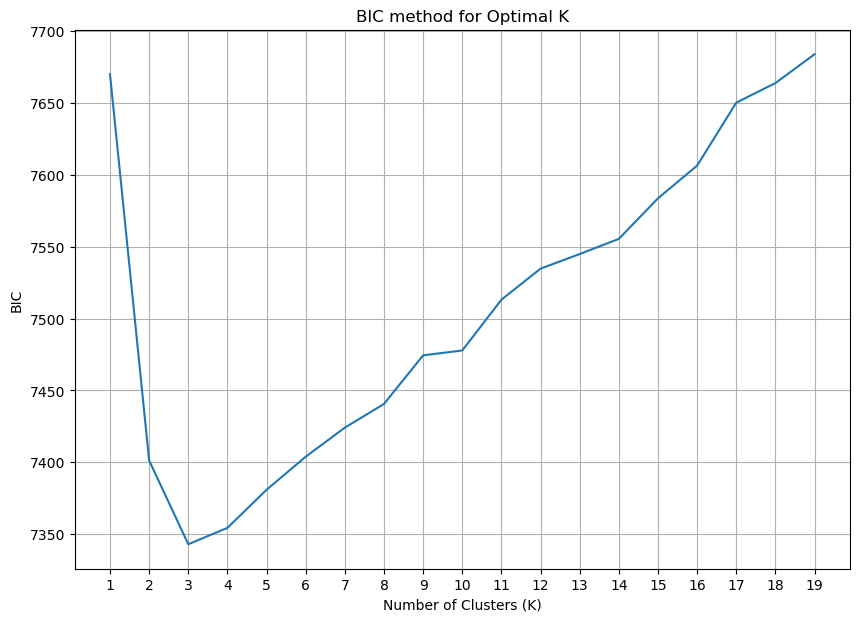

In [6]:
AIC = []
BIC = []
k_range = range(1, 20)

n_samples, n_features = visualization.shape

for i in k_range:
    gmm = GMM(k=i)
    gmm.fit(visualization)
    LL = gmm.getLikelihood(visualization)
    n_params = (i * n_features) + (i * n_features * (n_features + 1) // 2) + (i - 1)
    
    AIC.append(2 * n_params - 2 * LL)
    BIC.append(n_params * np.log(n_samples) - 2 * LL)



plt.figure(figsize=(10, 7))
plt.plot(k_range, AIC)
plt.title('AIC method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('AIC')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('plots/4_toydata_gmm-aic.png')
plt.show()    

plt.figure(figsize=(10, 7))
plt.plot(k_range, BIC)
plt.title('BIC method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('BIC')
plt.xticks(k_range)
plt.grid(True)
plt.savefig('plots/4_toydata_gmm-bic.png')
plt.show()   


In [7]:
AIC = []
BIC = []
k_range = range(1, 2)

n_samples, n_features = string_array.shape

for i in k_range:
    gmm = GMM(k=i)
    gmm.fit(string_array)
    LL = gmm.getLikelihood(string_array)
    n_params = (i * n_features) + (i * n_features * (n_features + 1) // 2) + (i - 1)
    
    AIC.append(2 * n_params - 2 * LL)
    BIC.append(n_params * np.log(n_samples) - 2 * LL)



plt.figure(figsize=(10, 7))
plt.plot(k_range, AIC)
plt.title('AIC method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('AIC')
plt.xticks(k_range)
plt.grid(True)
plt.show()    

plt.figure(figsize=(10, 7))
plt.plot(k_range, BIC)
plt.title('BIC method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('BIC')
plt.xticks(k_range)
plt.grid(True)
plt.show()   


/home/rohit/miniconda3/envs/smai/lib/python3.12/site-packages/scipy/stats/_multivariate.py:587: RuntimeWarning: overflow encountered in exp
  out = np.exp(self._logpdf(x, mean, cov_object))
/home/rohit/Desktop/SMAI/smai-m24-assignments-RohitVarmaSixtyFive/models/GMM/GMM.py:56: RuntimeWarning: invalid value encountered in divide
  responsibilities /= responsibilities_sum


ValueError: array must not contain infs or NaNs

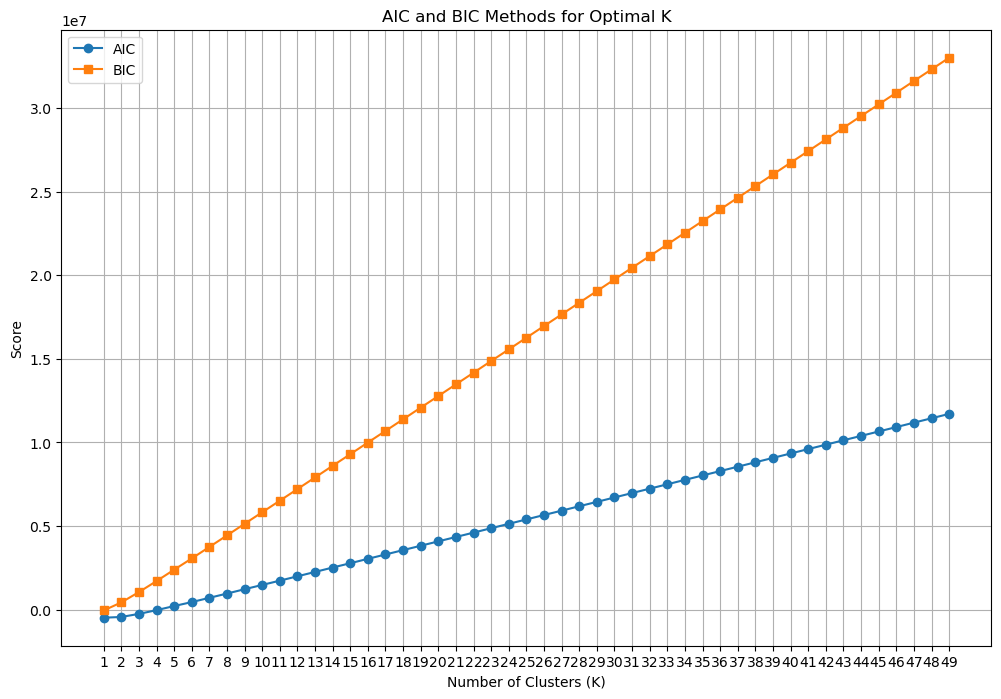

In [7]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

AIC = []
BIC = []
k_range = range(1, 50)


n_samples, n_features = string_array.shape

for i in k_range:

    gmm = GaussianMixture(n_components=i, covariance_type='full', n_init=10, tol=1e-3)
    gmm.fit(string_array)
    AIC.append(gmm.aic(string_array))
    BIC.append(gmm.bic(string_array))

plt.figure(figsize=(12, 8))
plt.plot(k_range, AIC, label='AIC', marker='o')
plt.plot(k_range, BIC, label='BIC', marker='s')
plt.title('AIC and BIC Methods for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.savefig('plots/4_main_gmm-aic-bic.png')
plt.show()


#### K_gmm1 = 1

In [ ]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

AIC = []
BIC = []
k_range = range(1, 10)

# Assuming string_array is your data matrix
n_samples, n_features = string_array.shape

for i in k_range:
    # Using multiple initializations for stability and specifying tolerance
    gmm = GaussianMixture(n_components=i, covariance_type='full', n_init=10, tol=1e-3)
    gmm.fit(string_array)
    AIC.append(gmm.lower_bound_)
    BIC.append(gmm.bic(string_array))

# Plot AIC and BIC
plt.figure(figsize=(12, 8))
plt.plot(k_range, AIC, label='AIC', marker='o')
# plt.plot(k_range, BIC, label='BIC', marker='s')
plt.title('AIC and BIC Methods for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.show()
